 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [40]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [41]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
# whale_returns.describe()
whale_returns.sort_index(ascending = True, inplace = True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [42]:
# Count nulls
print(whale_returns.isnull().sum())
print(whale_returns[whale_returns.isnull().any(axis = 1)])

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64
            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  


In [43]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [44]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns.sort_index(ascending = True, inplace = True)
algo_returns.head(100)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2014-10-10,-0.012612,-0.011752
2014-10-13,-0.018528,-0.002009
2014-10-14,0.000702,0.004501


In [45]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [46]:
# Drop nulls
algo_returns.dropna(inplace = True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [47]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history.sort_index(ascending = True, inplace = True)
sp500_history.head()
sp500_history["Close"].str.lstrip("$")

Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
               ...   
2019-04-16    2907.06
2019-04-17    2900.45
2019-04-18    2905.03
2019-04-22    2907.97
2019-04-23    2933.68
Name: Close, Length: 1649, dtype: object

In [48]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [49]:
# Fix Data Types
sp500_history["Close"]= sp500_history["Close"].str.replace('$','').astype("float")
print(sp500_history.dtypes)
sp500_history.head()
#sp500_history = sp500_history["Close"].str.lstrip("$")
#sp500_history = pd.to_numeric(sp500_history, downcast='float')
#sp500_history["Close"]= sp500_history["Close"].str.replace('$','').astype("float")
#sp500_history.sort_index(inplace = True)
#sp500_history

Close    float64
dtype: object


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [50]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [51]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)
print(sp500_daily_returns.isnull().sum())

Close    0
dtype: int64


In [52]:
# Rename Column
sp500_daily_returns.columns = ["S&P 500"]
sp500_daily_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [53]:
# Concatenate all DataFrames into a single DataFrame
daily_returns = pd.concat([whale_returns, algo_returns, sp500_daily_returns], axis = "columns",join = "inner")
daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

<AxesSubplot:xlabel='Date'>

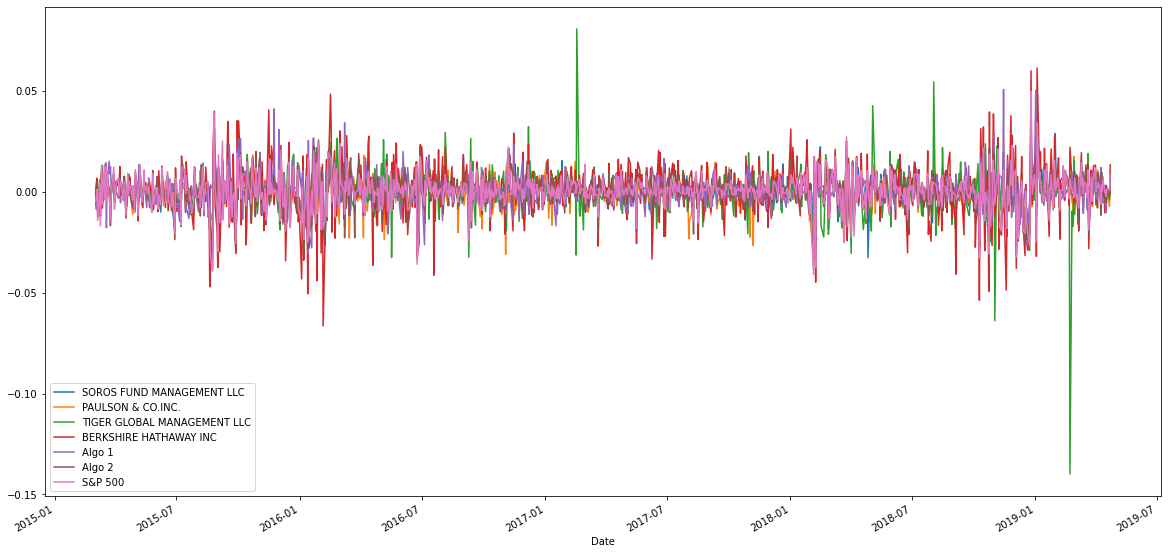

In [54]:
# Plot daily returns
daily_returns.plot(figsize = (20,10))

In [7]:
print("Tiger seems like it has a day of volitilities, BHI as well")

Tiger seems like it has a day of volitilities, BHI as well


<AxesSubplot:xlabel='Date'>

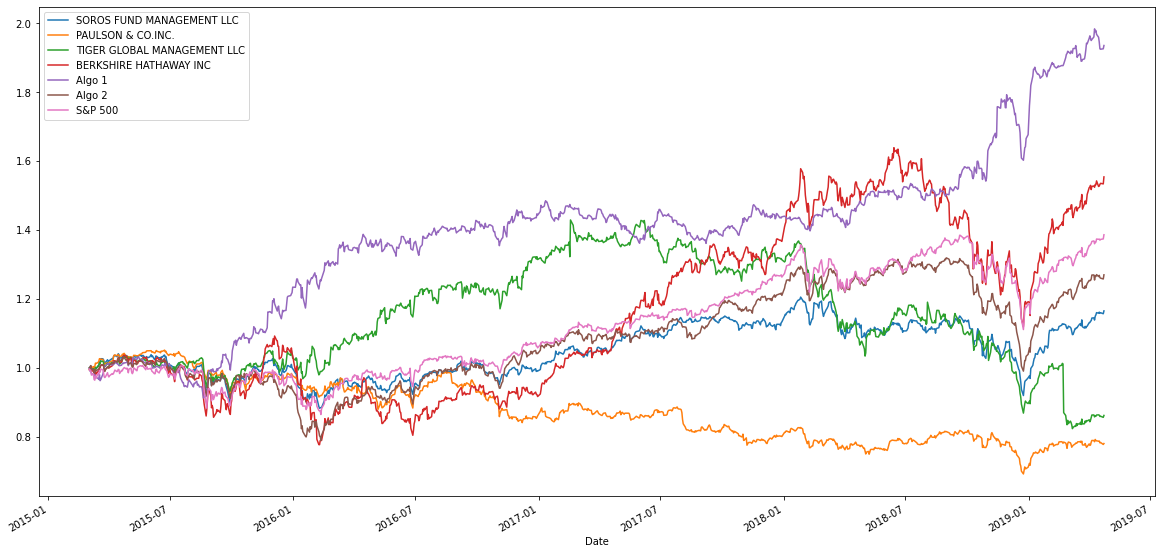

In [56]:
# Plot cumulative returns
daily_returns_cum = (1+ daily_returns).cumprod()
daily_returns_cum.plot(figsize = (20,10))

In [57]:
print("Algo 1's return is leading, followed by Berkshine HATHAWAY INC")

Algo 1's return is leading, followed by Berkshine HATHAWAY INC


## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

<AxesSubplot:>

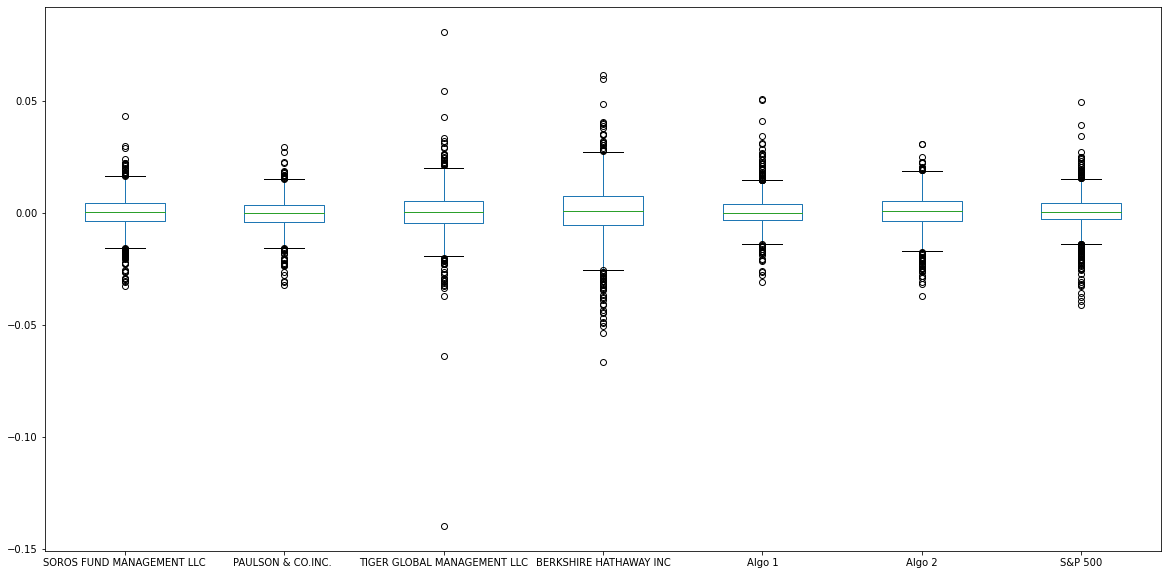

In [58]:
# Box plot to visually show risk
daily_returns.plot(kind = "box", figsize = (20,10))

In [59]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
daily_returns_daily_std = pd.DataFrame(daily_returns.std()).rename(columns = {0:"std"})
daily_returns_daily_std

,std
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
S&P 500,0.008554


In [60]:
# Determine which portfolios are riskier than the S&P 500
higher_std = daily_returns_daily_std[daily_returns_daily_std["std"] > daily_returns_daily_std.loc["S&P 500", "std"]]
higher_std

,std
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


In [61]:
# Calculate the annualized standard deviation (252 trading days)
daily_returns_annualized_std = daily_returns_daily_std*np.sqrt(252)
daily_returns_annualized_std

,std
SOROS FUND MANAGEMENT LLC,0.125335
PAULSON & CO.INC.,0.111488
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077
Algo 1,0.120967
Algo 2,0.132430
S&P 500,0.135786


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

<AxesSubplot:xlabel='Date'>

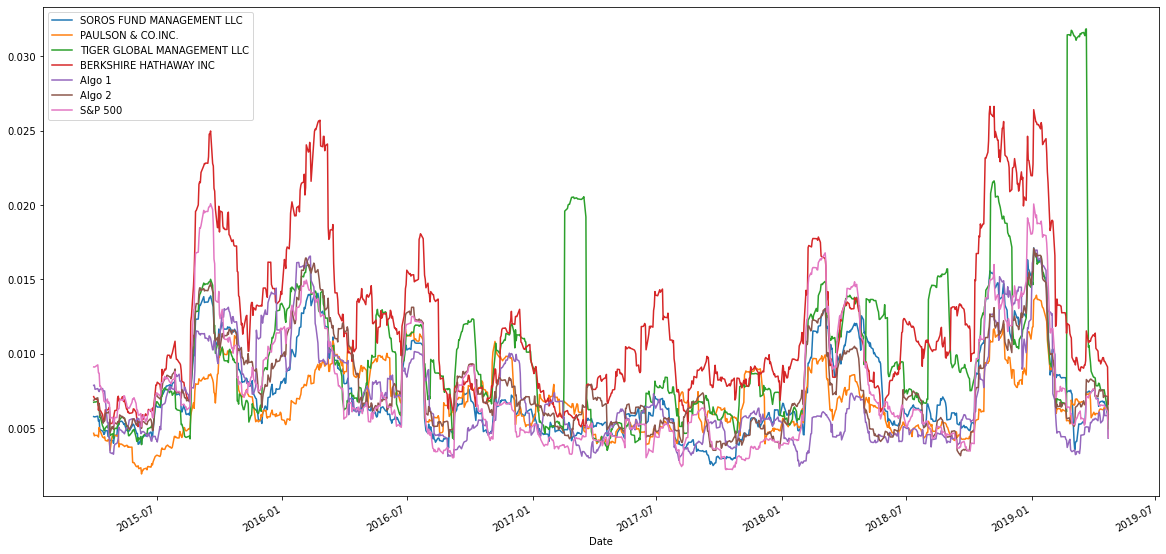

In [62]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
daily_returns.rolling(window=21).std().plot(kind='line', figsize=(20,10))


In [63]:
# Construct a correlation table
correlation = daily_returns.corr()
print("Algo 2 has the highest correlation with S&P 500. *")
correlation


Algo 2 has the highest correlation with S&P 500. *


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:xlabel='Date'>

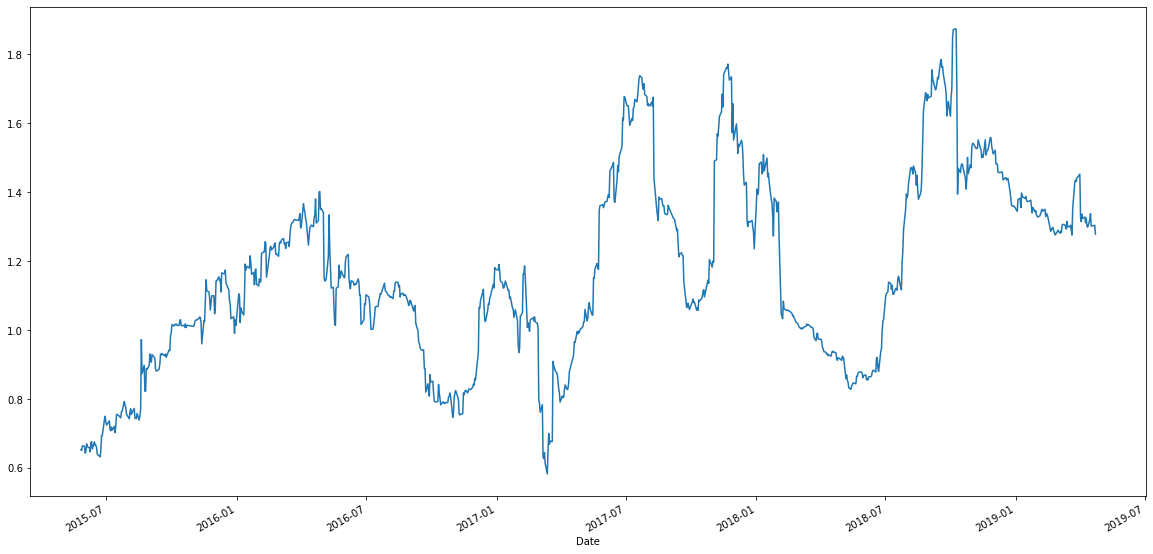

In [64]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
covariance_berkshire = daily_returns["BERKSHIRE HATHAWAY INC"].rolling(window = 60).cov(daily_returns["S&P 500"])
variance_berkshire = daily_returns["S&P 500"].rolling(window = 60).var()
beta_berkshire = covariance_berkshire / variance_berkshire
beta_berkshire.plot(kind='line', figsize=(20, 10))


<AxesSubplot:xlabel='Date'>

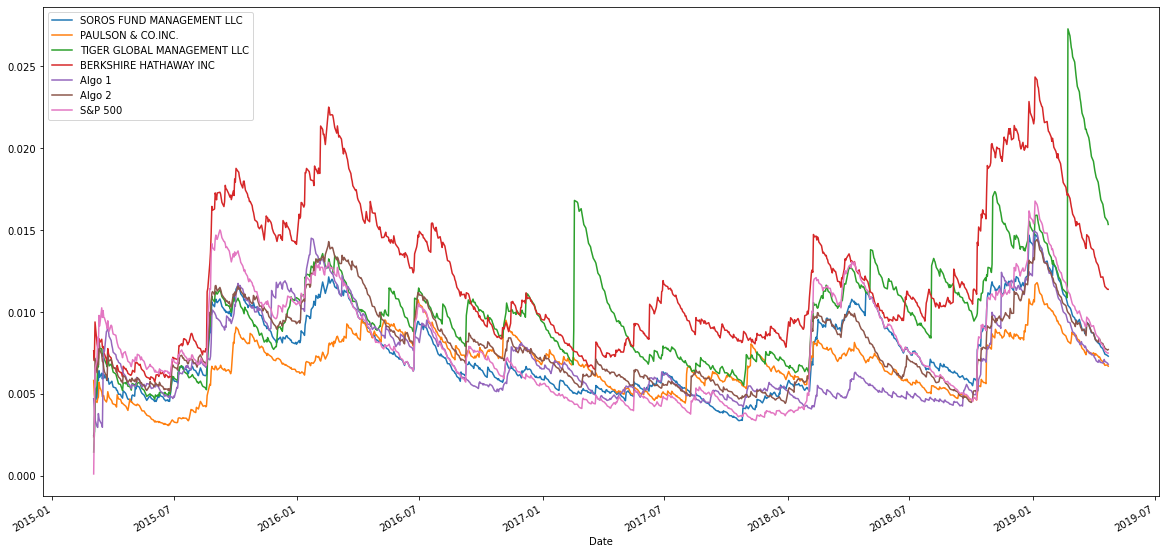

In [65]:
# Calculate a rolling window using the exponentially weighted moving average. 
daily_returns.ewm(halflife = 21).std().plot(figsize=(20, 10))

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [66]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (daily_returns.mean() * 252) / (daily_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

<AxesSubplot:title={'center':'Rharpe_Ratios'}>

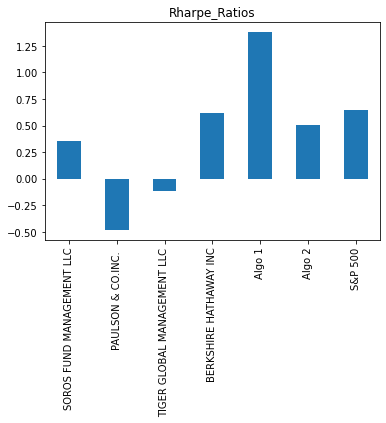

In [67]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Rharpe_Ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

Based on the Sharpe ratio, Algo 1 vastly out-performs the S&P 500. However Algo 2 underperforms the S&P 500. The results for other portfolios are a mixed bag, with several slightly below the S&P 500 and two with negative Sharpe Ratio values.

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [68]:
# Read the first stock
facebookprice = pd.read_csv(Path("Resources/FB.csv"), index_col="Date", parse_dates = True, infer_datetime_format= True)
facebookprice.rename(columns = {"Close":"FB"}, inplace = True)
facebookprice.sort_index(ascending = True, inplace = True)
facebookprice.head()

,FB
Date,
2018-01-02,181.419998
2018-01-03,184.669998
2018-01-04,184.330002
2018-01-05,186.850006
2018-01-08,188.279999


In [69]:
# Read the second stock
squareprice = pd.read_csv(Path("Resources/SQ.csv"), index_col="Date", parse_dates = True, infer_datetime_format= True)
squareprice.rename(columns = {"Close":"SQ"}, inplace = True)
squareprice.sort_index(ascending = True, inplace = True)
squareprice.head()


,SQ
Date,
2018-01-02,36.169998
2018-01-03,37.310001
2018-01-04,38.099998
2018-01-05,41.139999
2018-01-08,40.759998


In [70]:
# Read the third stock
teslaprice = pd.read_csv(Path("Resources/TSLA.csv"), index_col="Date", parse_dates = True, infer_datetime_format= True)
teslaprice.rename(columns = {"Close":"TSLA"}, inplace = True)
teslaprice.sort_index(ascending = True, inplace = True)
teslaprice.head()


,TSLA
Date,
2018-01-02,64.106003
2018-01-03,63.450001
2018-01-04,62.924000
2018-01-05,63.316002
2018-01-08,67.281998


In [71]:
# Concatenate all stocks into a single DataFrame
my_stocks = pd.concat((facebookprice, teslaprice, squareprice), axis = 1, join= "inner")
my_stocks.sort_index(ascending = True, inplace = True)
my_stocks.head()

,FB,TSLA,SQ
Date,,,
2018-01-02,181.419998,64.106003,36.169998
2018-01-03,184.669998,63.450001,37.310001
2018-01-04,184.330002,62.924000,38.099998
2018-01-05,186.850006,63.316002,41.139999
2018-01-08,188.279999,67.281998,40.759998


In [72]:
# Reset the index
my_stocks.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill="")

,Date,FB,TSLA,SQ
0,2018-01-02,181.419998,64.106003,36.169998
1,2018-01-03,184.669998,63.450001,37.310001
2,2018-01-04,184.330002,62.924000,38.099998
3,2018-01-05,186.850006,63.316002,41.139999
4,2018-01-08,188.279999,67.281998,40.759998
...,...,...,...,...
694,2020-10-05,264.649994,425.679993,180.919998
695,2020-10-06,258.660004,413.980011,175.339996
696,2020-10-07,258.119995,425.299988,180.179993
697,2020-10-08,263.760010,425.920013,183.500000


In [73]:
my_stocks.isnull().sum()

FB      0
TSLA    0
SQ      0
dtype: int64

In [74]:
# Pivot so that each column of prices represents a unique symbol
final_portofolio = my_stocks.pivot_table( index ="Date")
final_portofolio

,FB,SQ,TSLA
Date,,,
2018-01-02,181.419998,36.169998,64.106003
2018-01-03,184.669998,37.310001,63.450001
2018-01-04,184.330002,38.099998,62.924000
2018-01-05,186.850006,41.139999,63.316002
2018-01-08,188.279999,40.759998,67.281998
...,...,...,...
2020-10-05,264.649994,180.919998,425.679993
2020-10-06,258.660004,175.339996,413.980011
2020-10-07,258.119995,180.179993,425.299988


In [75]:
# Drop Nulls
final_portofolio.dropna(inplace=True)
final_portofolio.head()

,FB,SQ,TSLA
Date,,,
2018-01-02,181.419998,36.169998,64.106003
2018-01-03,184.669998,37.310001,63.450001
2018-01-04,184.330002,38.099998,62.924000
2018-01-05,186.850006,41.139999,63.316002
2018-01-08,188.279999,40.759998,67.281998


In [76]:
final_portofolio.isnull().sum()

FB      0
SQ      0
TSLA    0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [77]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
weights = [1/3, 1/3, 1/3]
my_portfolio = final_portofolio.dot(weights)
my_portfolio_returns = my_portfolio.pct_change()
my_portfolio_returns.dropna(inplace = True)
my_portfolio_returns.head()

Date
2018-01-03    0.013255
2018-01-04   -0.000266
2018-01-05    0.020858
2018-01-08    0.017219
2018-01-09   -0.002815
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [78]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
portfolio_returns = pd.concat((my_portfolio_returns,daily_returns), axis = "columns", join = "inner")
portfolio_returns.rename(columns = {0:"my_portfolio"}, inplace = True)
portfolio_returns

,my_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,,
2018-01-03,0.013255,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.006399
2018-01-04,-0.000266,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.004029
2018-01-05,0.020858,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,0.007034
2018-01-08,0.017219,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,0.001662
2018-01-09,-0.002815,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.001303
...,...,...,...,...,...,...,...,...
2019-04-16,-0.000924,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.004058,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,-0.006913,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


In [79]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_returns.dropna(inplace=True)
portfolio_returns.head()

,my_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,,
2018-01-03,0.013255,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.006399
2018-01-04,-0.000266,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.004029
2018-01-05,0.020858,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,0.007034
2018-01-08,0.017219,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,0.001662
2018-01-09,-0.002815,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.001303


In [80]:
portfolio_returns.isnull().sum()

my_portfolio                   0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
dtype: int64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [81]:
# Risk
portfolio_std = pd.DataFrame(portfolio_returns.std()).rename(columns = {0:"std"})
portfolio_std

,std
my_portfolio,0.021627
SOROS FUND MANAGEMENT LLC,0.009486
PAULSON & CO.INC.,0.007383
TIGER GLOBAL MANAGEMENT LLC,0.014023
BERKSHIRE HATHAWAY INC,0.014726
Algo 1,0.007670
Algo 2,0.008836
S&P 500,0.010175


In [82]:
higher_std = portfolio_std[portfolio_std["std"] > portfolio_std.loc["S&P 500", "std"]]
higher_std

,std
my_portfolio,0.021627
TIGER GLOBAL MANAGEMENT LLC,0.014023
BERKSHIRE HATHAWAY INC,0.014726


In [83]:
print("My portofolio is the riskiest in all portofolio")

My portofolio is the riskiest in all portofolio


<AxesSubplot:xlabel='Date'>

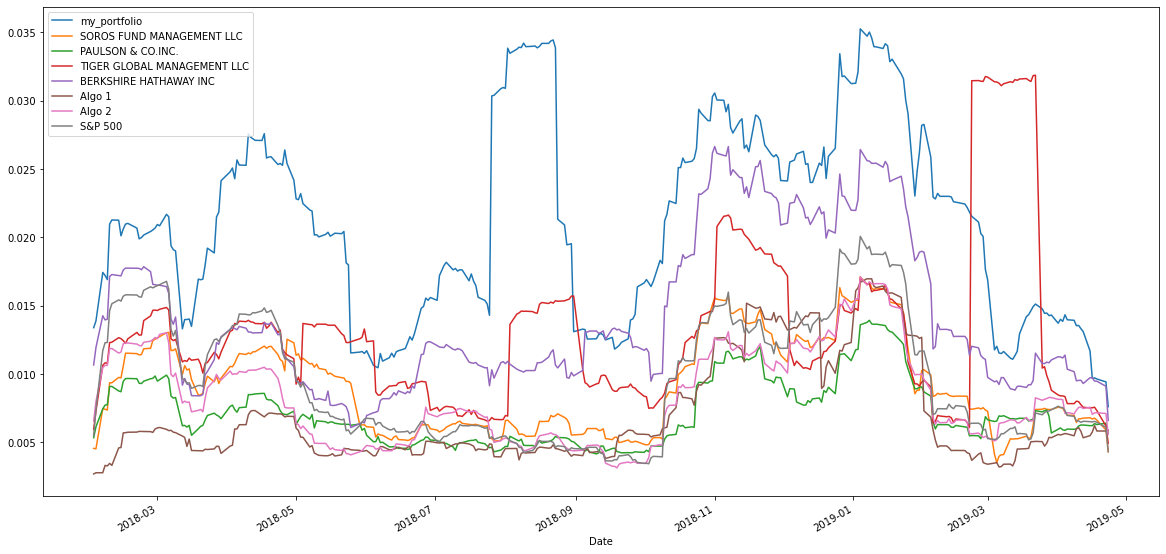

In [84]:
# Rolling
portfolio_returns.rolling(window=21).std().plot(kind='line', figsize=(20, 10))

In [85]:
# Annualized Sharpe Ratios
sharpe_ratios = (portfolio_returns.mean()*252)/(portfolio_returns.std()*np.sqrt(252))
print(sharpe_ratios)

my_portfolio                   0.380060
SOROS FUND MANAGEMENT LLC      0.143496
PAULSON & CO.INC.             -0.209302
TIGER GLOBAL MANAGEMENT LLC   -1.327618
BERKSHIRE HATHAWAY INC         0.439395
Algo 1                         1.932709
Algo 2                         0.240768
S&P 500                        0.484234
dtype: float64


<AxesSubplot:title={'center':'sharpe ratios'}>

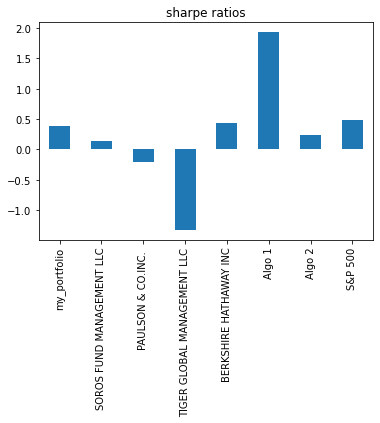

In [86]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar', title = "sharpe ratios")

In [91]:
print("My portflolio is in the same evolution of perfomance as BHI and S&P 500 in 2018, only trailing Algo 1")

My portflolio is in the same evolution of perfomance as BHI and S-P 500 in 2018, only trailing Algo 1


In [88]:
# Create a correlation analysis
correlation_my_portfolio = portfolio_returns.corr()
print("Algo 2 has the highest correlation with S&P 500")
correlation_my_portfolio.style.background_gradient(cmap="viridis")

Algo 2 has the highest correlation with S&P 500


,my_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
my_portfolio,1.000000,0.651392,0.560750,0.323171,0.780519,0.225903,0.641548,0.707131
SOROS FUND MANAGEMENT LLC,0.651392,1.000000,0.776507,0.528789,0.794609,0.330594,0.840760,0.849601
PAULSON & CO.INC.,0.560750,0.776507,1.000000,0.537938,0.664404,0.341950,0.805066,0.790232
TIGER GLOBAL MANAGEMENT LLC,0.323171,0.528789,0.537938,1.000000,0.390582,0.144345,0.489538,0.566628
BERKSHIRE HATHAWAY INC,0.780519,0.794609,0.664404,0.390582,1.000000,0.316841,0.793788,0.843673
Algo 1,0.225903,0.330594,0.341950,0.144345,0.316841,1.000000,0.341346,0.280197
Algo 2,0.641548,0.840760,0.805066,0.489538,0.793788,0.341346,1.000000,0.887061
S&P 500,0.707131,0.849601,0.790232,0.566628,0.843673,0.280197,0.887061,1.000000


Date
2018-01-03   NaN
2018-01-04   NaN
2018-01-05   NaN
2018-01-08   NaN
2018-01-09   NaN
dtype: float64

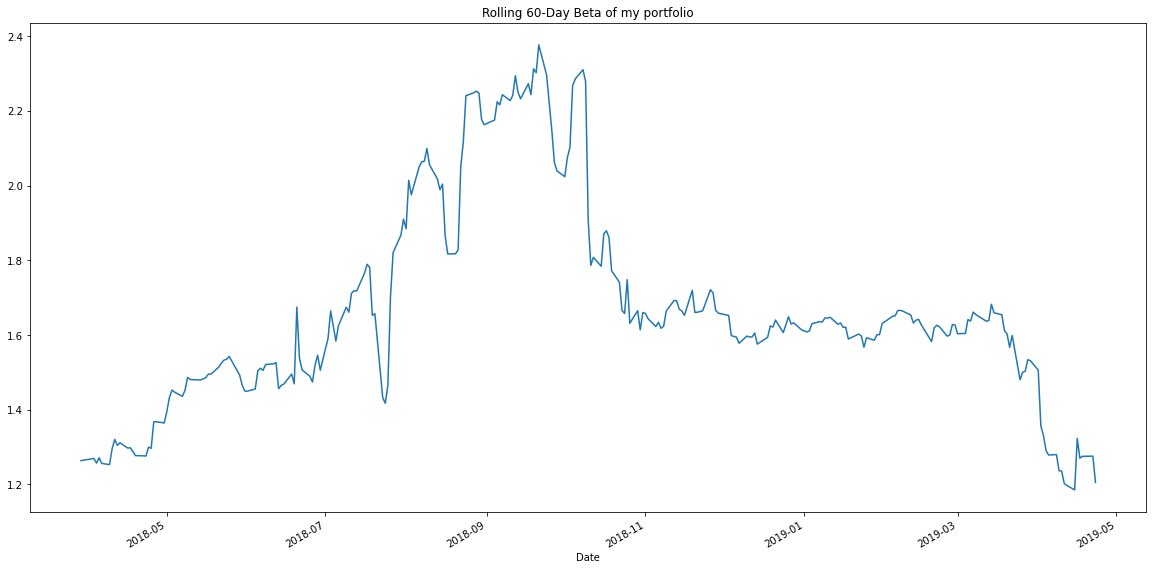

In [89]:
# Beta
rolling_covariance = portfolio_returns['my_portfolio'].rolling(window=60).cov(portfolio_returns["S&P 500"])
rolling_variance = portfolio_returns["S&P 500"].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of my portfolio')
rolling_beta.sort_index(ascending = True, inplace = True)
rolling_beta.head()

<AxesSubplot:xlabel='Date'>

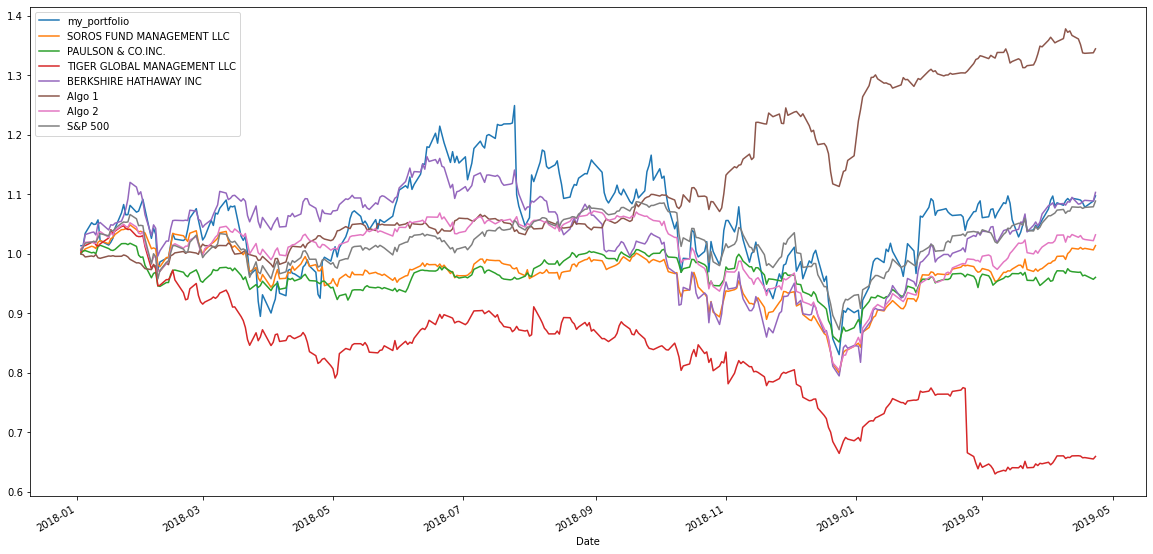

In [90]:
daily_returns_cum = (1+ portfolio_returns).cumprod()
daily_returns_cum.plot(figsize = (20,10))

In [6]:
print("My portfolio tracks the market, my Beta is sometimes a little bit high at 2.4. My portfolio is about average with the Market because it has the same value as the S&P 500 they kind of get the same returns and the same risks as investing in the S&P 500. My portfolio is actually a very good representation of the S&P 500, as it fairly well correlates.")

My portfolio tracks the market, my Beta is sometimes a little bit high at 2.4. My portfolio is about average with the Market because it has the same value as the S&P 500 they kind of get the same returns and the same risks as investing in the S&P 500. My portfolio is actually a very good representation of the S&P 500, as it fairly well correlates.
